In [1]:
import pandas as pd
pd.set_option('display.max_columns', 75)

In [2]:
nbaData="NBAdata.csv"
temp=pd.read_csv(nbaData)
stats=temp.copy()
stats=stats.drop("#", axis=1)
stats=stats.drop("blank2", axis=1)
stats=stats.drop("blanl", axis=1)

stats.rename(columns={"Season Start": "Season"}, inplace=True)
stats.rename(columns={"Tm": "Team"}, inplace=True)
stats.rename(columns={"Player Name": "Name"}, inplace=True)
stats.rename(columns={"Player Salary in $": "Salary"}, inplace=True)
stats.rename(columns={"G": "GP"}, inplace=True)

#mapping numeric values onto positions
mapping = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C':5}
stats['Pos'] = stats['Pos'].map(mapping)

In [3]:
#ratio of Games started to games played
stats["GS/GP"]=stats["GS"]/stats["GP"]

#removing last row from dataset because it's null
stats=stats[:-1]

In [4]:
stats

Season            Name    Salary  Pos   Age Team    GP    GS      MP  \
0      1995.0      A.C. Green   6473000  3.0  31.0  PHO  82.0  52.0  2687.0   
1      1995.0     Aaron McKie    845000  2.0  22.0  POR  45.0  20.0   827.0   
2      1995.0   Aaron Swinson       NaN  3.0  24.0  PHO   9.0   0.0    51.0   
3      1995.0  Aaron Williams       NaN  4.0  23.0  MIL  15.0   0.0    72.0   
4      1995.0       Acie Earl   1040000  5.0  24.0  BOS  30.0   3.0   208.0   
...       ...             ...       ...  ...   ...  ...   ...   ...     ...   
12824  2017.0    Yogi Ferrell   1312611  1.0  23.0  BRK  10.0   0.0   151.0   
12825  2017.0    Yogi Ferrell   1312611  1.0  23.0  DAL  36.0  29.0  1046.0   
12826  2017.0     Zach LaVine   3202217  2.0  21.0  MIN  47.0  47.0  1749.0   
12827  2017.0   Zach Randolph  12307692  4.0  35.0  MEM  73.0   5.0  1786.0   
12828  2017.0   Zaza Pachulia   3477600  5.0  32.0  GSW  70.0  70.0  1268.0   

        PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  \
0      14.2  0.596  0.206  0.556   8.3  20.4  14.3   6.5   1.0   0.8  12.9   
1      13.3  0.500  0.107  0.280   4.6  13.5   8.8  15.9   2.2   1.4  11.7   
2      11.7  0.594  0.000  0.278   6.7  11.3   9.0   9.0   1.0   0.0  19.8   
3       7.0  0.410  0.042  0.500   8.1  24.1  15.9   0.0   1.4   6.2  19.3   
4       6.6  0.409  0.000  0.426  10.4  14.6  12.5   1.4   1.5   2.6  14.8   
...     ...    ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
12824   6.5  0.482  0.551  0.327   2.8   5.5   4.2  16.9   0.6   1.0  20.0   
12825  14.1  0.541  0.432  0.212   1.7   9.7   5.5  24.1   2.0   0.6  12.9   
12826  14.6  0.576  0.437  0.197   1.2   9.5   5.3  12.6   1.2   0.5   9.9   
12827  18.5  0.490  0.098  0.200  11.3  27.4  19.1  13.5   1.1   0.5   8.6   
12828  16.1  0.588  0.007  0.410  12.9  22.0  17.7  13.6   2.2   2.0  19.5   

       USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP     FG    FGA  \
0      14.2  4.6  2.1  6.7  0.120   0.6   0.2   0.7   1.9  311.0  617.0   
1      17.0  0.8  1.2  2.0  0.115  -1.2   1.3   0.1   0.4  116.0  261.0   
2      21.4  0.0  0.0  0.0  0.039  -2.9  -2.9  -5.8   0.0   10.0   18.0   
3      22.3 -0.2  0.1 -0.1 -0.067 -11.8  -2.9 -14.7  -0.2    8.0   24.0   
4      19.7 -0.4  0.2 -0.2 -0.038  -6.8  -1.9  -8.7  -0.4   26.0   68.0   
...     ...  ...  ...  ...    ...   ...   ...   ...   ...    ...    ...   
12824  19.9 -0.2  0.0 -0.2 -0.050  -4.0  -3.3  -7.3  -0.2   18.0   49.0   
12825  19.5  1.0  0.9  2.0  0.090   0.5  -0.3   0.2   0.6  142.0  345.0   
12826  21.7  2.5  0.4  3.0  0.082   2.1  -2.4  -0.3   0.8  326.0  710.0   
12827  29.2  0.8  2.4  3.2  0.086  -1.4  -0.7  -2.1   0.0  433.0  964.0   
12828  15.3  2.2  2.5  4.7  0.177  -0.3   3.0   2.7   1.5  164.0  307.0   

         FG%     3P    3PA    3P%     2P    2PA    2P%   eFG%     FT    FTA  \
0      0.504   43.0  127.0  0.339  268.0  490.0  0.547  0.539  251.0  343.0   
1      0.444   11.0   28.0  0.393  105.0  233.0  0.451  0.466   50.0   73.0   
2      0.556    0.0    0.0    NaN   10.0   18.0  0.556  0.556    4.0    5.0   
3      0.333    0.0    1.0  0.000    8.0   23.0  0.348  0.333    8.0   12.0   
4      0.382    0.0    0.0    NaN   26.0   68.0  0.382  0.382   14.0   29.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12824  0.367    8.0   27.0  0.296   10.0   22.0  0.455  0.449   10.0   16.0   
12825  0.412   60.0  149.0  0.403   82.0  196.0  0.418  0.499   64.0   73.0   
12826  0.459  120.0  310.0  0.387  206.0  400.0  0.515  0.544  117.0  140.0   
12827  0.449   21.0   94.0  0.223  412.0  870.0  0.474  0.460  141.0  193.0   
12828  0.534    0.0    2.0  0.000  164.0  305.0  0.538  0.534   98.0  126.0   

         FT%    ORB    DRB    TRB    AST   STL   BLK    TOV     PF     PTS  \
0      0.732  194.0  475.0  669.0  127.0  55.0  31.0  114.0  146.0   916.0   
1      0.685   35.0   94.0  129.0   89.0  36.0  16.0   39.0   97.0   293.0   
2      0.800    3.0    5.0    8.0    

In [5]:
stats[stats['Name'] == 'Zach LaVine']

Season         Name   Salary  Pos   Age Team    GP    GS      MP   PER  \
11650  2015.0  Zach LaVine  2148360  1.0  19.0  MIN  77.0  40.0  1902.0  11.3   
12231  2016.0  Zach LaVine  2240880  2.0  20.0  MIN  82.0  33.0  2294.0  14.3   
12826  2017.0  Zach LaVine  3202217  2.0  21.0  MIN  47.0  47.0  1749.0  14.6   

         TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  \
11650  0.515  0.247  0.261   1.6  11.6   6.4  24.0   1.4   0.4  20.4  22.0   
12231  0.548  0.330  0.212   1.4  10.1   5.8  18.6   1.5   0.6  12.9  23.5   
12826  0.576  0.437  0.197   1.2   9.5   5.3  12.6   1.2   0.5   9.9  21.7   

       OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP     FG    FGA    FG%  \
11650 -0.7  0.0 -0.7 -0.018  -1.7  -2.7 -4.5  -1.2  286.0  677.0  0.422   
12231  1.9  0.7  2.6  0.054   1.0  -2.4 -1.4   0.3  433.0  959.0  0.452   
12826  2.5  0.4  3.0  0.082   2.1  -2.4 -0.3   0.8  326.0  710.0  0.459   

          3P    3PA    3P%     2P    2PA    2P%   eFG%     FT    FTA    FT%  \
11650   57.0  167.0  0.341  229.0  510.0  0.449  0.465  149.0  177.0  0.842   
12231  123.0  316.0  0.389  310.0  643.0  0.482  0.516  161.0  203.0  0.793   
12826  120.0  310.0  0.387  206.0  400.0  0.515  0.544  117.0  140.0  0.836   

        ORB    DRB    TRB    AST   STL   BLK    TOV     PF     PTS     GS/GP  
11650  27.0  187.0  214.0  276.0  54.0  10.0  193.0  158.0   778.0  0.519481  
12231  27.0  201.0  228.0  251.0  69.0  17.0  155.0  193.0  1150.0  0.402439  
12826  18.0  141.0  159.0  139.0  41.0  10.0   85.0  104.0   889.0  1.000000

In [6]:
#stats should be a on a per-game basis instead of totals to eliminate the effect of games played
stats["MPG"]=stats["MP"]/stats["GP"]
stats["ORPG"]=stats["ORB"]/stats["GP"]
stats["DRPG"]=stats["DRB"]/stats["GP"]
stats["RPG"]=stats["TRB"]/stats["GP"]
stats["APG"]=stats["AST"]/stats["GP"]
stats["SPG"]=stats["STL"]/stats["GP"]
stats["BPG"]=stats["BLK"]/stats["GP"]
stats["TPG"]=stats["TOV"]/stats["GP"]
stats["PFPG"]=stats["PF"]/stats["GP"]
stats["PPG"]=stats["PTS"]/stats["GP"]
stats["FGPG"]=stats["FG"]/stats["GP"]
stats["FGAPG"]=stats["FGA"]/stats["GP"]
stats["3PPG"]=stats["3P"]/stats["GP"]
stats["3PAPG"]=stats["3PA"]/stats["GP"]
stats["2PPG"]=stats["2P"]/stats["GP"]
stats["2PAPG"]=stats["2PA"]/stats["GP"]
stats["FTPG"]=stats["FT"]/stats["GP"]
stats["FTAPG"]=stats["FTA"]/stats["GP"]

#drop all total columns
drop_column = ['MP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA']
stats.drop(drop_column, axis=1, inplace = True)



In [7]:
#splitting stats into 3 categories for later on, when looking at which group of stats is the best predictor of salary
advanced=['% of Cap','PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
regular=['% of Cap','ORPG', 'DRPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PFPG', 'PPG', 'FGPG', 'FGAPG', '3PPG', '3PAPG', '2PPG', '2PAPG', 'FTPG', 'FTAPG']
basic=['% of Cap','Pos', 'Age', 'MPG', 'GP']

#change salary from object to float
stats["Salary"] = stats.Salary.astype(float)

#removed stars from some players names
stats['Name'] = stats['Name'].map(lambda x: x.rstrip('*'))


In [8]:
#dataset had total stats for a player if he was on two teams in one season, but we wanted to look at data on specific teams, too, so the "TOT" value wouldn't work
stats=stats[~stats["Team"].str.contains("TOT", na=False)]

#players don't qualify if they've played in less than or equal to 15 games on a team
stats=stats[stats['GP']>15]

#if no salary is in the dataset, we can't use that row
stats=stats.dropna(subset = ['Salary'])


#if a player still had a NaN at this point, it meant they didn't take any shots that season, so give them values of 0s for the percentages columns
empty=['TS%','3PAr','FTr','TOV%','FG%','3P%','2P%','eFG%','FT%']
for i in empty:
    stats[i].fillna(0, inplace=True)



In [9]:
#teams have changed names and locations over the years, this is keeping the franchises consistent
stats["Team"].replace("CHH", "NOP", inplace=True)
stats["Team"].replace("NOH", "NOP", inplace=True)
stats["Team"].replace("NOK", "NOP", inplace=True)
stats["Team"].replace("NJN", "BRK", inplace=True)
stats["Team"].replace("WSB", "WAS", inplace=True)
stats["Team"].replace("SEA", "OKC", inplace=True)
stats["Team"].replace("VAN", "MEM", inplace=True)
stats["Team"].replace("CHA", "CHO", inplace=True)
len(stats["Team"].unique())
#now only thirty teams in the league

30

In [10]:
#salary cap for all years from 1995 to 2017
from pandas import *
my_dic = pd.read_excel('salaryCap.xlsx', index_col=0).to_dict()
cap=my_dic['Salary Cap']

In [11]:
#to normalize salaries, make them as a percentage of the salary cap in that year
stats['Cap'] = stats['Season'].map(cap)
stats['% of Cap']=(stats['Salary']/stats['Cap'])*100

[]

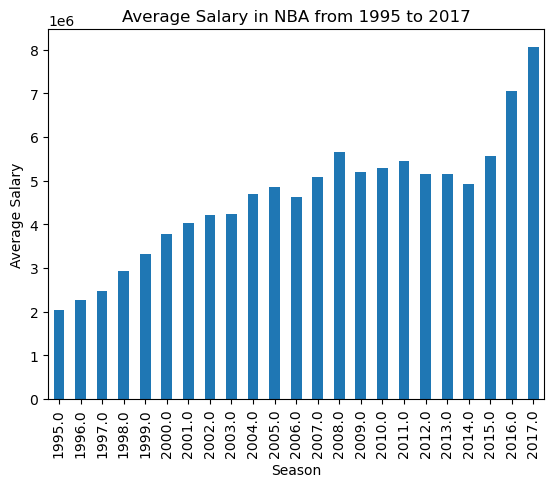

In [12]:
#DATA EXPLORATION
#Get mean of average NBA Salary from each year to show that it doesn't make sense to look at absolute salaries
sal=stats.groupby('Season')['Salary'].mean()
var=sal.plot.bar(x='Season', y='Salary')
var.set_ylabel("Average Salary")
var.set_title("Average Salary in NBA from 1995 to 2017")
var.plot()

[]

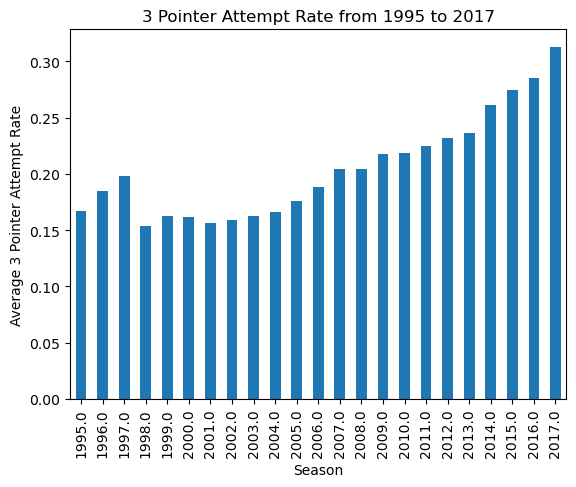

In [13]:
#Plot showing how 3 Point Attempt Rate has changed over time
threePM=stats.groupby('Season')['3PAr'].mean()
graph=threePM.plot.bar()
graph.set_ylabel('Average 3 Pointer Attempt Rate')
graph.set_title('3 Pointer Attempt Rate from 1995 to 2017')
graph.plot()

(45.0, 57.0)

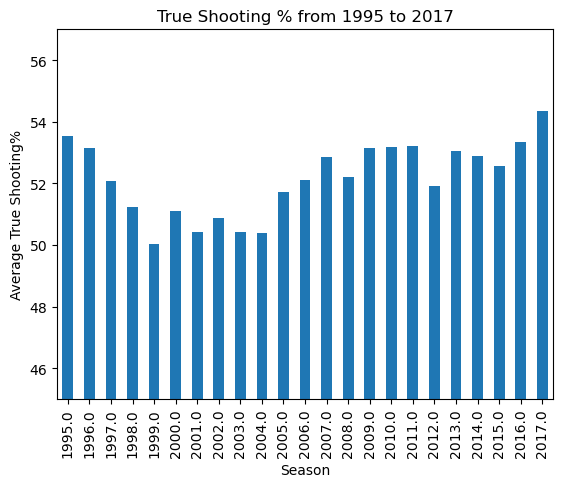

In [14]:
#More data exploration, looking at how an advanced metric, True Shooting %, has changed over time
ts=stats.groupby('Season')['TS%'].mean()
ts=ts*100
graph=ts.plot.bar()
graph.set_ylabel('Average True Shooting%')
graph.set_title('True Shooting % from 1995 to 2017')
graph.set_ylim(45,57)


<AxesSubplot: >

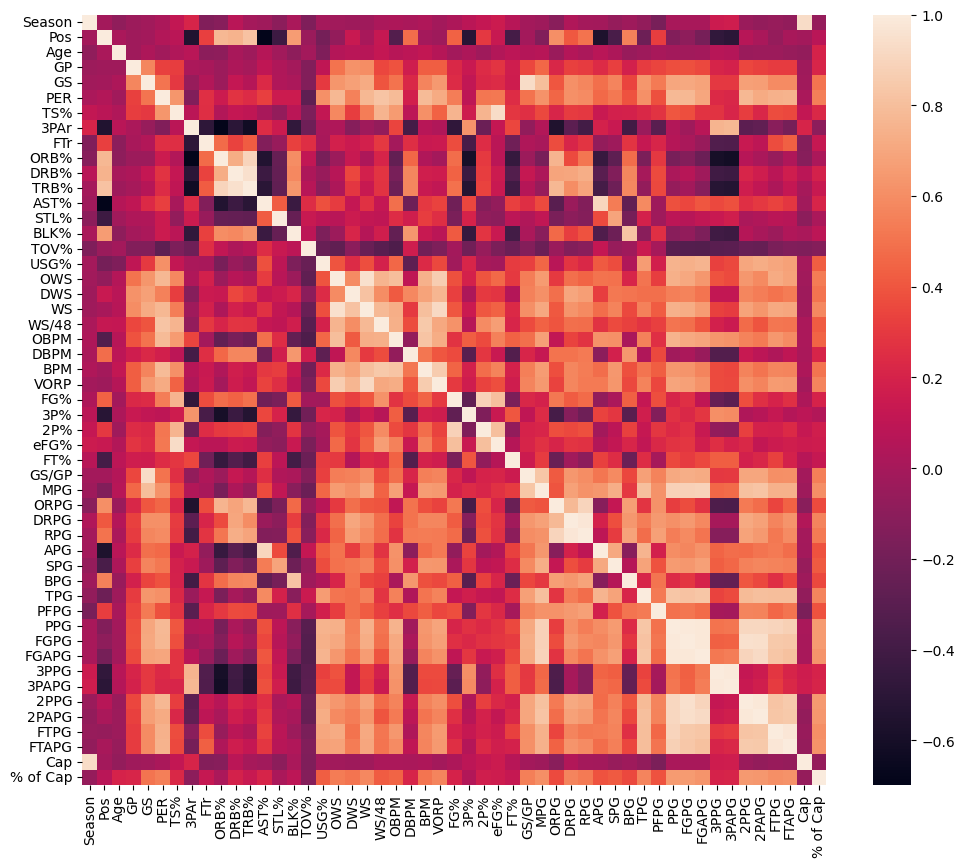

In [15]:
#remove salary in heatmap, store in separate variable
salary=stats['Salary']
stats=stats.drop('Salary', axis=1)


#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)



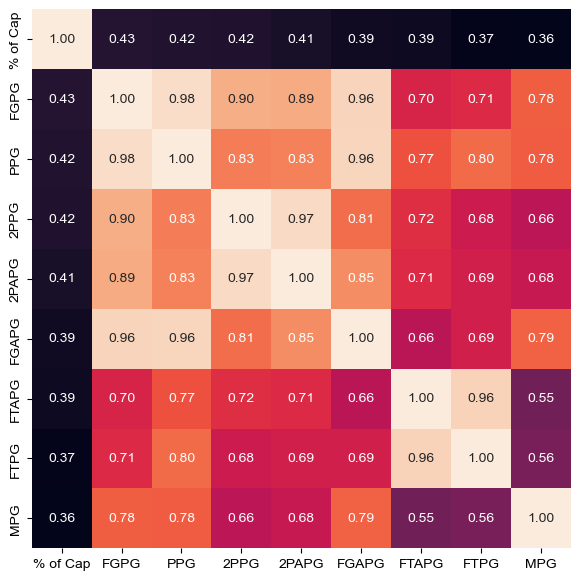

In [16]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with % of Cap for each of the data subsets
def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, '% of Cap')['% of Cap'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(stats, 9)

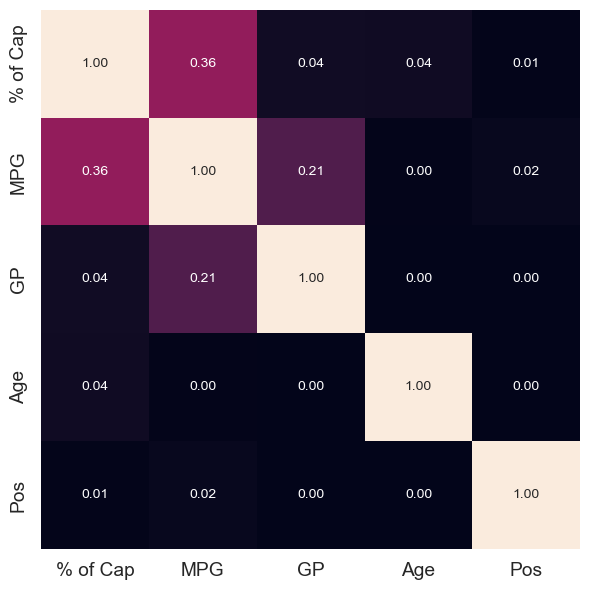

In [17]:
basic_stats=stats[basic]
regular_stats=stats[regular]
advanced_stats=stats[advanced]

#basic only has 5
heatMap(basic_stats, 6)


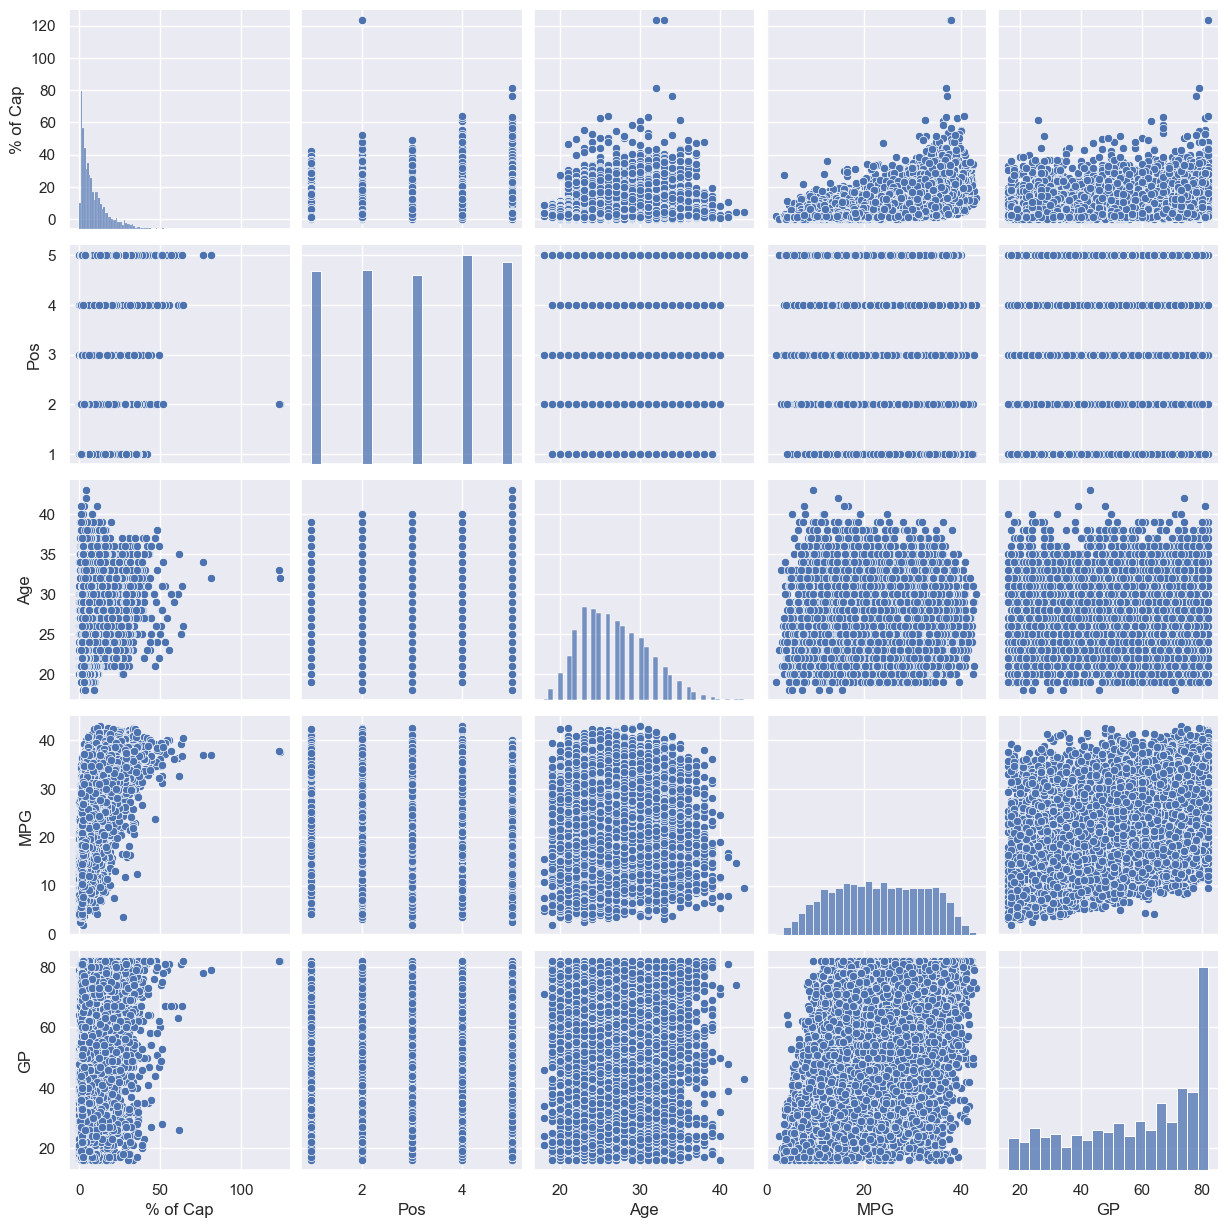

In [ ]:
#creating scatter plots to further look at the relationships between % of Cap and other vars
sns.set()
sns.pairplot(basic_stats, height=2.5)
plt.show()

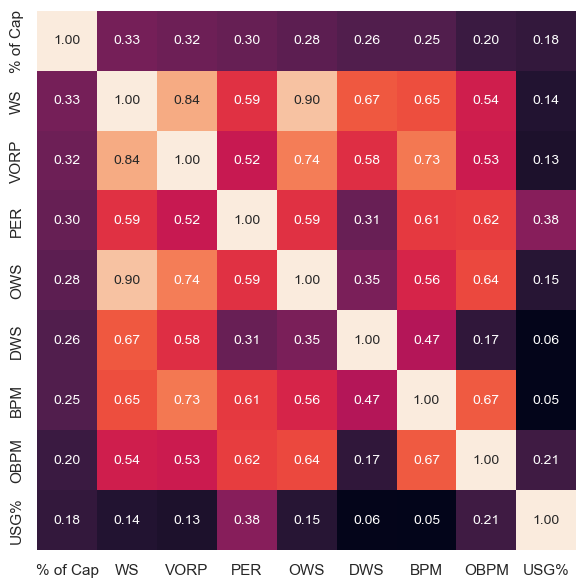

In [19]:
heatMap(advanced_stats, 9)

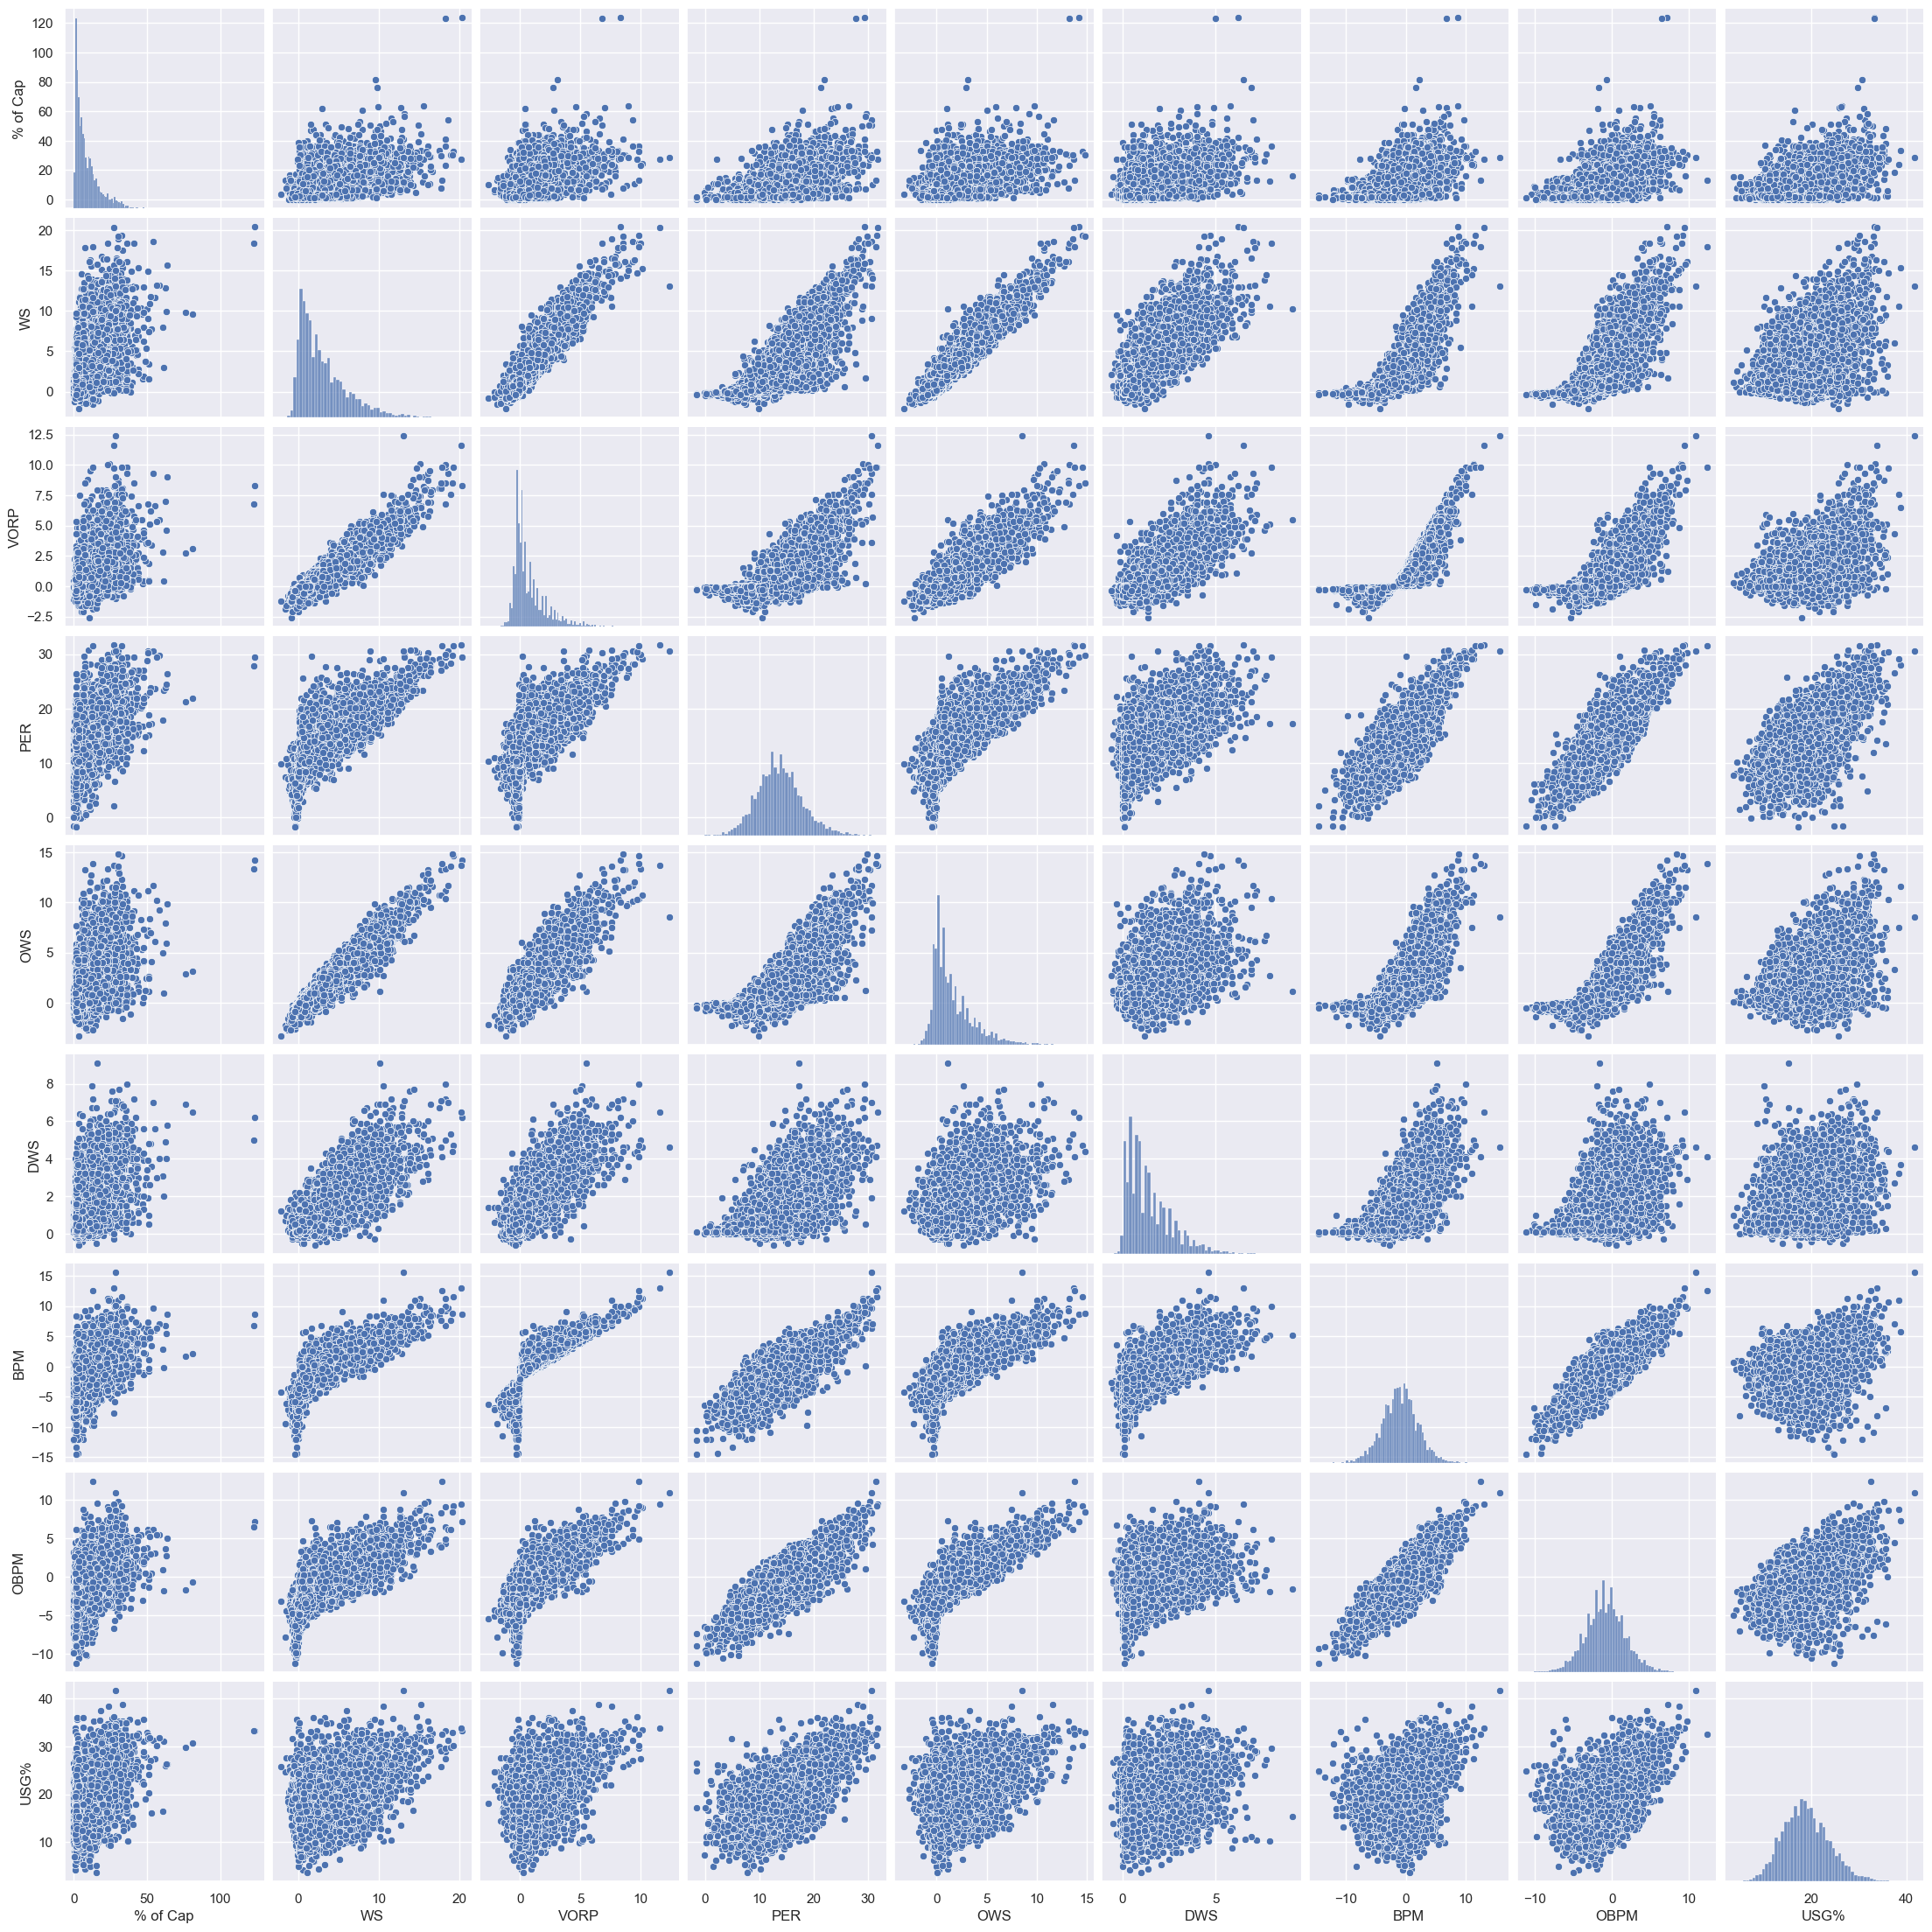

In [20]:
adv=['% of Cap', 'WS', 'VORP','PER','OWS','DWS','BPM','OBPM','USG%',]
sns.set()
sns.pairplot(advanced_stats[adv], height=2.5)
plt.show()

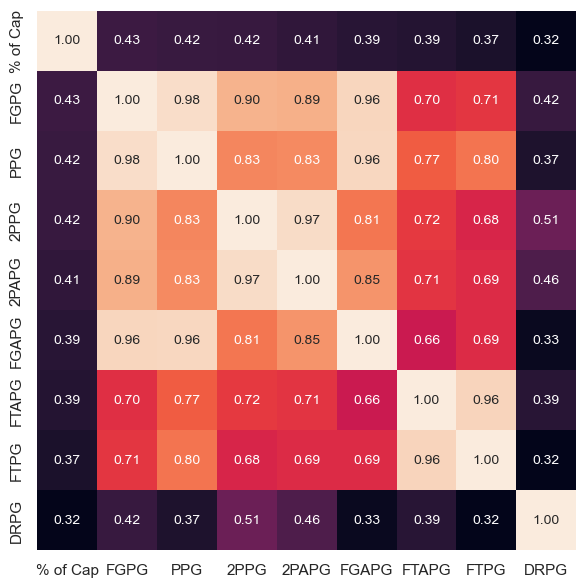

In [21]:
heatMap(regular_stats, 9)

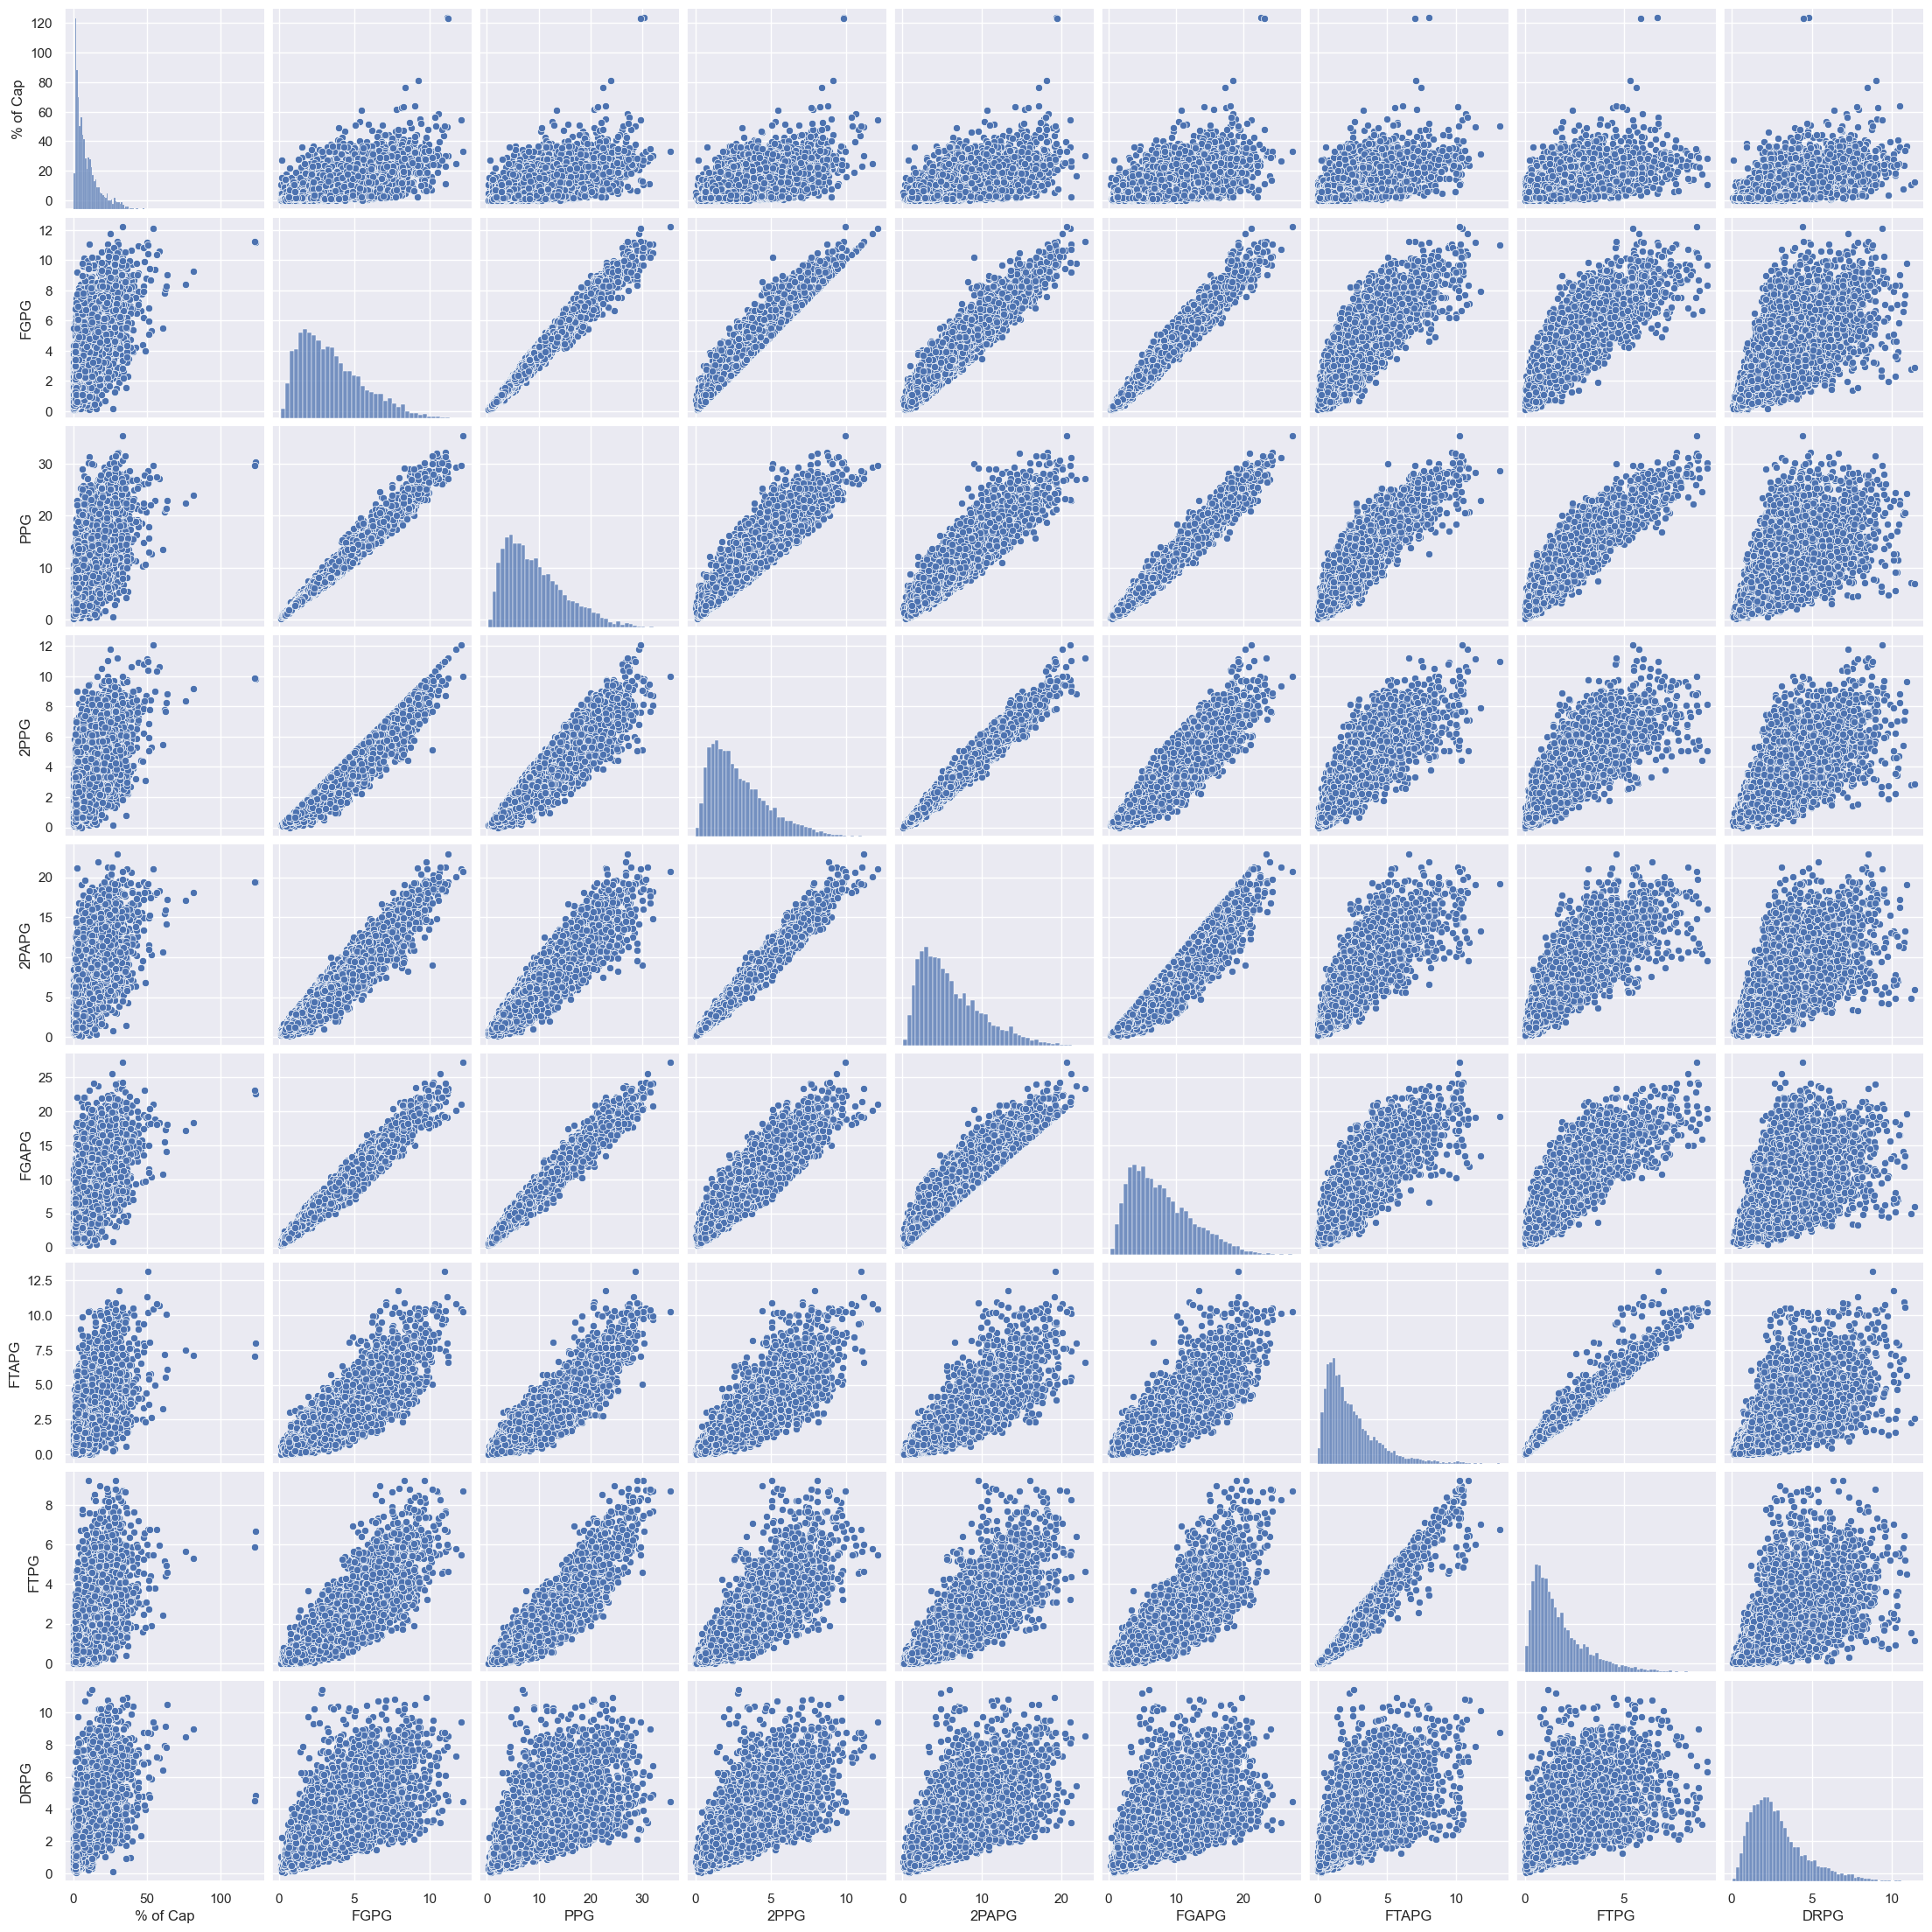

In [22]:
reg=['% of Cap', 'FGPG', 'PPG','2PPG','2PAPG','FGAPG','FTAPG','FTPG','DRPG']
sns.set()
sns.pairplot(regular_stats[reg], height=2.5)
plt.show()

In [23]:
#see if any variables are multicollinear, if so they can be removed
x = advanced_stats[['WS', 'VORP','PER','OWS', 'DWS','BPM','OBPM','USG%']]
basicDF=basic_stats[['Pos', 'Age', 'MPG', 'GP']]
z=regular_stats[['FGPG', 'PPG','2PPG','2PAPG','FGAPG','FTAPG','FTPG','DRPG']]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
    
#lower VIF factor values means less multicollinearity

VIF Factor features
0      7873.4       WS
1        14.2     VORP
2        53.3      PER
3      3099.3      OWS
4      1495.8      DWS
5        15.8      BPM
6         8.3     OBPM
7        55.0     USG%

In [24]:
#remove OWS and DWS from advanced stats because their VIF factor values are far too high
advancedDF = advanced_stats[['WS', 'VORP','PER','BPM','OBPM','USG%']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(advancedDF.values, i) for i in range(advancedDF.shape[1])]
vif["features"] = advancedDF.columns
vif.round(1)

VIF Factor features
0        16.9       WS
1        13.2     VORP
2        46.7      PER
3        10.1      BPM
4         3.8     OBPM
5        44.6     USG%

In [25]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(basicDF.values, i) for i in range(basicDF.shape[1])]
vif["features"] = basicDF.columns
vif.round(1)

#nothing too bad with basic stats

VIF Factor features
0         5.2      Pos
1        12.6      Age
2         9.2      MPG
3        10.8       GP

In [26]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif["features"] = z.columns
vif.round(1)

#some extremely high numbers, let's get rid of a few variables to see if it improves

/Users/amrutagajananbhat/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor features
0         inf     FGPG
1         inf      PPG
2         inf     2PPG
3       958.5    2PAPG
4      1067.0    FGAPG
5        93.4    FTAPG
6         inf     FTPG
7         7.3     DRPG

In [27]:
#remove: 2ppg because it's very similar to ppg. fgpg is correlated with fgapg as well. 
#FTPG correlated with FTAPG and FGPG correlated with PPG, so removed  those as well
regularDF=regular_stats[[ 'PPG','2PAPG','FTAPG','DRPG']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(regularDF.values, i) for i in range(regularDF.shape[1])]
vif["features"] = regularDF.columns
vif.round(1)

VIF Factor features
0        26.2      PPG
1        24.7    2PAPG
2        12.0    FTAPG
3         5.9     DRPG

Root Mean Squared Error is : 6.8384064412047065
R sq is : 0.4007731124412325


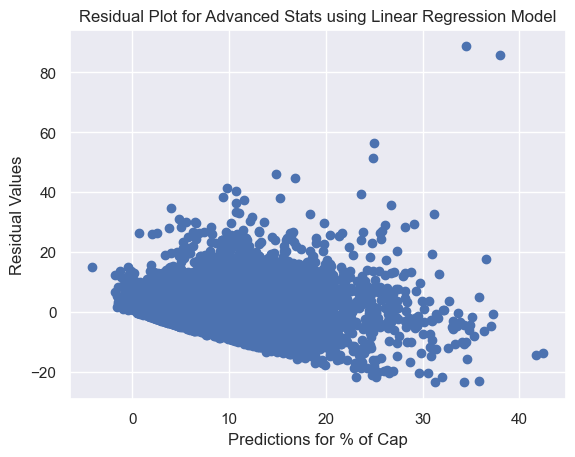

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

#target array
y=stats[['% of Cap']]


#ADVANCED STATS
linreg = LinearRegression()

#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(advancedDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, advancedDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for % of Cap')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Advanced Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.734939701268681
R sq is : 0.41876882977312946


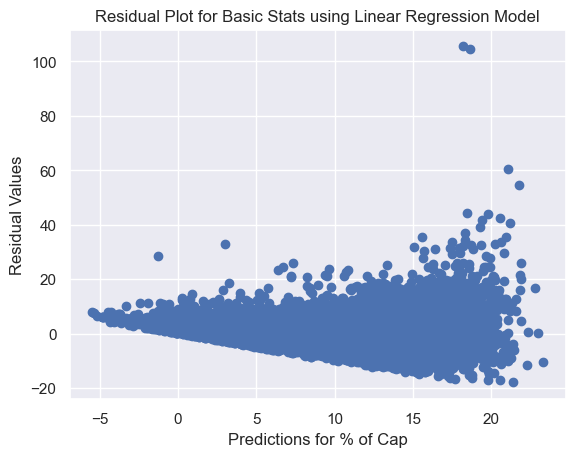

In [29]:
#BASIC STATS
x_train, x_test, y_train, y_test=train_test_split(basicDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, basicDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for % of Cap')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Basic Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.457833389603527
R sq is : 0.4656139096368649


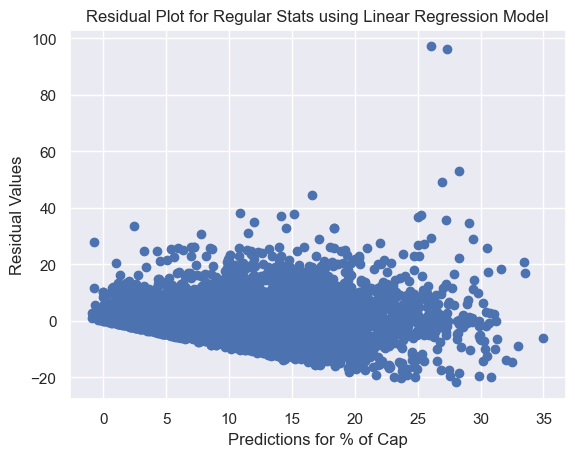

In [30]:
#REGULAR STATS
x_train, x_test, y_train, y_test=train_test_split(regularDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, regularDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for % of Cap')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Regular Stats using Linear Regression Model')
plt.show()


In [31]:
#Regular Stats had the highest R squared and lowest RMSE values, so that's the subsection that I will be using to look at overvalued and undervalued players
#positive residual=overvalued, negative=undervalued
stats['Predicted % of Cap']=predict
stats['Residuals']=residuals
stats['Resid %']=(stats['Residuals']/stats['% of Cap']*100)

In [32]:
copy=stats
copy=copy[['Season', 'Name', 'Age', 'Team', 'PER', '% of Cap', 'Predicted % of Cap', 'Residuals']]
copy=copy.sort_values('Residuals')
#get top25 most undervalued players
top25=copy[:25]
top25


Season                   Name   Age Team   PER   % of Cap  \
12551  2017.0     Karl-Anthony Towns  21.0  MIN  26.0   6.273743   
4406   2003.0            Karl Malone  39.0  UTA  21.7   3.421533   
3517   2001.0            Paul Pierce  23.0  BOS  22.3   4.826520   
6122   2006.0           LeBron James  21.0  CLE  28.1  10.968458   
5217   2004.0          Zach Randolph  22.0  POR  19.6   3.428931   
8999   2011.0             Kevin Love  22.0  MIN  24.3   7.941736   
8385   2010.0           Kevin Durant  21.0  OKC  26.2  10.429438   
3987   2002.0         Michael Jordan  38.0  WAS  20.7   2.557672   
3278   2001.0          Dirk Nowitzki  22.0  DAL  22.8   5.076694   
8704   2011.0          Blake Griffin  21.0  LAC  21.9   9.873682   
12664  2017.0           Nikola Jokic  21.0  DEN  26.4   1.484850   
5401   2005.0            Dwyane Wade  23.0  MIA  23.1   6.125091   
5563   2005.0           LeBron James  20.0  CLE  25.7   9.336970   
1666   1998.0        Charles Barkley  34.0  HOU  21.6   3.333333   
11048  2015.0          Anthony Davis  21.0  NOP  30.8  10.101043   
1600   1998.0         Antoine Walker  21.0  BOS  17.8   7.023333   
12547  2017.0           Jusuf Nurkic  22.0  POR  21.1   2.974282   
5908   2006.0             Chris Bosh  21.0  TOR  23.2   7.970678   
10355  2013.0          Tobias Harris  20.0  ORL  17.0   2.634401   
11843  2016.0  Giannis Antetokounmpo  21.0  MIL  18.8   3.181778   
12507  2017.0            Joel Embiid  22.0  PHI  24.1   6.156102   
12455  2017.0          Isaiah Thomas  27.0  BOS  26.5   6.318706   
8140   2010.0            Brook Lopez  21.0  BRK  20.1   4.157742   
7796   2009.0           Kevin Durant  20.0  OKC  20.8   8.313484   
3583   2001.0           Shawn Marion  22.0  PHO  21.0   4.183906   

       Predicted % of Cap  Residuals  
12551           28.032464 -21.758721  
4406            23.660177 -20.238644  
3517            24.796634 -19.970114  
6122            30.816153 -19.847695  
5217            23.118497 -19.689566  
8999            27.605995 -19.664259  
8385            29.877678 -19.448240  
3987            21.658672 -19.101000  
3278            24.163166 -19.086472  
8704            28.322918 -18.449236  
12664           19.519635 -18.034786  
5401            23.761018 -17.635927  
5563            26.869326 -17.532356  
1666            20.837552 -17.504219  
11048           27.483250 -17.382207  
1600            24.171211 -17.147878  
12547           20.098746 -17.124465  
5908            24.930264 -16.959585  
10355           19.431072 -16.796671  
11843           19.946901 -16.765123  
12507           22.717239 -16.561137  
12455           22.809669 -16.490963  
8140            20.557900 -16.400158  
7796            24.707853 -16.394369  
3583            20.538917 -16.355011

In [33]:
ageMean=top25['Age'].mean()
print ('Average age is:',ageMean)

perMean=top25['PER'].mean()
print ('Average PER is:',perMean)

percentMean=top25['% of Cap'].mean()
print ('Average % of Cap is:',percentMean)

residMean=top25['Residuals'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')


Average age is: 23.44
Average PER is: 22.864
Average % of Cap is: 5.923764141052273
Average absolute value Residual is: 18.093552099854776 %


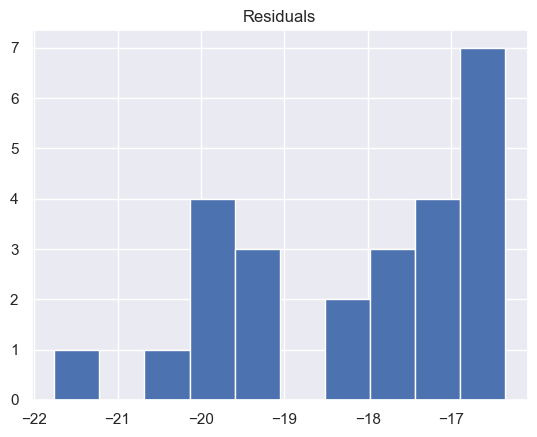

In [34]:
hist=top25.hist(column='Residuals')

In [35]:
#get most overvalued players by residuals
bottom25=copy[-25:]
bottom25

Season              Name   Age Team   PER    % of Cap  \
3416   2001.0     Kevin Garnett  24.0  MIN  23.9   52.705882   
2410   1999.0     Kevin Garnett  22.0  MIN  22.4   49.430294   
11097  2015.0  Cameron Bairstow  24.0  CHI   2.1   27.142857   
861    1996.0     Reggie Miller  30.0  IND  20.1   46.176579   
4080   2002.0  Shaquille O'Neal  29.0  LAL  29.7   58.532018   
2905   2000.0     Kevin Garnett  23.0  MIN  23.6   55.239437   
5237   2005.0     Allan Houston  33.0  NYK  12.5   38.636364   
3571   2001.0    Scottie Pippen  35.0  POR  15.3   42.549562   
3923   2002.0      Juwan Howard  28.0  DEN  17.1   51.215515   
3667   2002.0   Alonzo Mourning  31.0  MIA  18.9   51.227434   
2895   2000.0      Juwan Howard  26.0  WAS  12.3   47.535211   
9465   2012.0    Gilbert Arenas  30.0  MEM   9.9   35.848532   
4424   2003.0     Kevin Garnett  26.0  MIN  26.4   63.868613   
2835   2000.0   Hakeem Olajuwon  37.0  HOU  16.7   47.042254   
5138   2004.0  Shaquille O'Neal  31.0  LAL  24.4   63.132961   
1976   1998.0     Patrick Ewing  35.0  NYK  23.3   61.666667   
3922   2002.0      Juwan Howard  28.0  DAL  15.1   51.215515   
3935   2002.0     Kevin Garnett  25.0  MIN  23.8   62.576047   
1242   1997.0      Horace Grant  31.0  ORL  17.3   53.106743   
4074   2002.0    Scottie Pippen  36.0  POR  14.9   48.986924   
699    1996.0      Horace Grant  30.0  ORL  17.9   60.981817   
1415   1997.0     Patrick Ewing  34.0  NYK  21.3   76.208178   
331    1995.0     Patrick Ewing  32.0  NYK  21.9   81.408696   
824    1996.0    Michael Jordan  32.0  CHI  29.4  123.712187   
1395   1997.0    Michael Jordan  33.0  CHI  27.8  123.197026   

       Predicted % of Cap  Residuals  
3416            25.469724  27.236158  
2410            22.029292  27.401002  
11097           -0.766960  27.909817  
861             17.182439  28.994140  
4080            29.433868  29.098150  
2905            26.029043  29.210394  
5237             7.744180  30.892183  
3571            11.471871  31.077692  
3923            18.375407  32.840108  
3667            18.344593  32.882841  
2895            14.515571  33.019641  
9465             2.449781  33.398751  
4424            29.068908  34.799705  
2835            11.944198  35.098056  
5138            27.274146  35.858815  
1976            24.999124  36.667542  
3922            14.094676  37.120839  
3935            25.254579  37.321468  
1242            15.152562  37.954181  
4074            10.851009  38.135915  
699             16.569207  44.412610  
1415            26.911904  49.296275  
331             28.255328  53.153367  
824             27.338935  96.373252  
1395            26.057493  97.139533

In [36]:
ageMean=bottom25['Age'].mean()
print ('Average age is:',ageMean)

perMean=bottom25['PER'].mean()
print ('Average PER is:',perMean)

percentMean=bottom25['% of Cap'].mean()
print ('Average % of Cap is:',percentMean)

residMean=bottom25['Residuals'].mean()
print ('Average Residual is:',residMean, '%')



Average age is: 29.8
Average PER is: 19.52
Average % of Cap is: 58.93373251563292
Average Residual is: 39.89169739093991 %


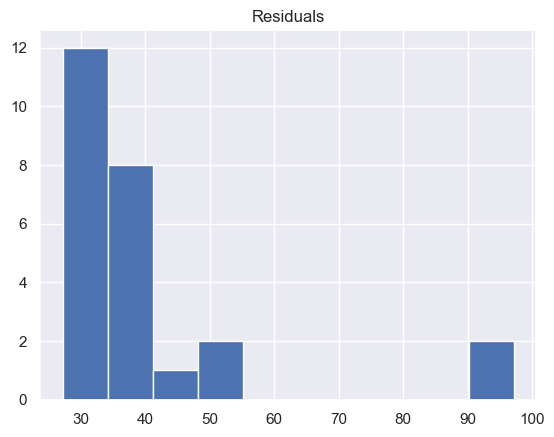

In [37]:
graph=bottom25.hist(column='Residuals')

In [38]:
#trying a different method, because raw residual values tends to discriminate against superstars who are being paid a lot of money

copy2=stats
copy2=copy2[['Season', 'Name', 'Age', 'Team', 'PER','% of Cap', 'Predicted % of Cap', 'Resid %']]
copy2=copy2.sort_values('Resid %')
top25B=copy2[:25]
top25B

Season              Name   Age Team   PER  % of Cap  \
12094  2016.0     P.J. Hairston  23.0  MEM   5.7  0.012252   
12093  2016.0     P.J. Hairston  23.0  CHO   7.4  0.012252   
6092   2006.0       Kareem Rush  25.0  CHO   9.8  0.036635   
11166  2015.0     Dorell Wright  29.0  POR  13.4  0.025196   
12286  2017.0        Beno Udrih  34.0  DET  16.1  0.025229   
4378   2003.0      Jelani McCoy  25.0  TOR  12.4  0.083583   
11839  2016.0         Gary Neal  31.0  WAS  13.5  0.076684   
11819  2016.0    Elijah Millsap  28.0  UTA   6.5  0.024504   
2418   1999.0      Kornel David  27.0  CHI  13.6  0.079585   
7653   2009.0     Desmond Mason  31.0  OKC   7.1  0.133189   
3658   2002.0       A.J. Guyton  23.0  CHI  11.8  0.046555   
3002   2000.0  Randy Livingston  24.0  PHO  11.4  0.056338   
11459  2015.0     Nate Robinson  30.0  DEN  10.6  0.062857   
5277   2005.0    Ben Handlogten  31.0  UTA  10.3  0.070891   
12550  2017.0    K.J. McDaniels  23.0  BRK  12.5  0.100915   
1012   1997.0   Adrian Caldwell  30.0  PHI   8.8  0.074349   
8897   2011.0         Ike Diogu  27.0  LAC  13.7  0.110309   
10570  2014.0        Earl Clark  26.0  CLE   8.6  0.099187   
2651   2000.0    Anthony Miller  28.0  HOU  13.5  0.112676   
11699  2016.0      Axel Toupane  23.0  DEN   7.1  0.054650   
3487   2001.0    Mike Penberthy  26.0  LAL  11.2  0.066835   
10662  2014.0    Jarvis Varnado  25.0  PHI  13.4  0.118925   
11232  2015.0        Henry Sims  24.0  PHI  14.5  0.230889   
12084  2016.0       Norris Cole  27.0  NOP  10.8  0.263419   
12524  2017.0   Jordan Crawford  28.0  NOP  17.6  0.252288   

       Predicted % of Cap       Resid %  
12094            6.177720 -50323.884455  
12093            5.506244 -44843.149255  
6092             7.607046 -20664.428606  
11166            4.348653 -17159.495517  
12286            4.350643 -17144.732547  
4378             8.594131 -10182.091748  
11839            7.541369  -9734.293295  
11819            2.085527  -8410.891657  
2418             5.921091  -7339.931134  
7653             8.534463  -6307.787909  
3658             2.880640  -6087.660891  
3002             3.462764  -6046.405635  
11459            3.715893  -5811.648079  
5277             4.162824  -5772.154386  
12550            5.894898  -5741.431074  
1012             4.183798  -5527.208622  
8897             5.679274  -5048.493756  
10570            4.908812  -4849.070016  
2651             5.389673  -4683.334780  
11699            2.547209  -4560.963880  
3487             2.907141  -4249.708614  
10662            4.819771  -3952.784664  
11232            8.940442  -3772.188954  
12084           10.120044  -3741.797883  
12524            9.641968  -3721.806192

In [39]:
ageMean=top25B['Age'].mean()
print ('Average age is:',ageMean)

perMean=top25B['PER'].mean()
print ('Average PER is:',perMean)

percentMean=top25B['% of Cap'].mean()
print ('Average % of Cap is:',percentMean)

residMean=top25B['Resid %'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')



Average age is: 26.84
Average PER is: 11.252
Average % of Cap is: 0.08920771146442923
Average absolute value Residual is: 10627.093741857832 %


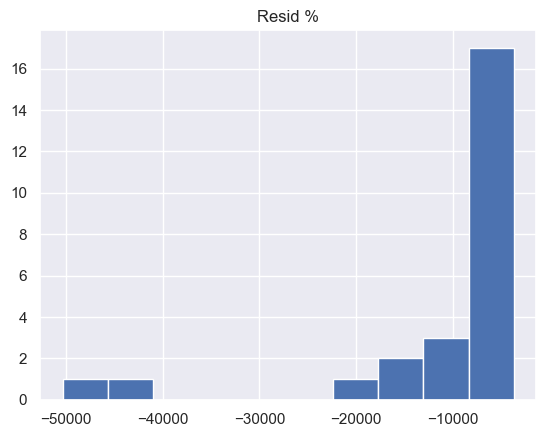

In [40]:
his=top25B.hist(column='Resid %')

In [41]:
bottom25B=copy2[-25:]
bottom25B

Season                  Name   Age Team  PER   % of Cap  \
8545   2010.0            Royal Ivey  28.0  MIL  6.8   2.067397   
6364   2006.0      Yaroslav Korolev  18.0  LAC  4.8   3.448349   
587    1996.0            David Wood  31.0  GSW  8.7   1.015885   
5024   2004.0       Michael Stewart  28.0  BOS  1.5  10.941418   
7935   2009.0       Randolph Morris  23.0  ATL  1.8   1.482130   
1071   1997.0           Carl Thomas  27.0  CLE  8.5   1.012082   
4210   2003.0     Brandon Armstrong  22.0  BRK  3.9   2.271099   
5695   2005.0          Robert Swift  19.0  OKC  5.2   3.564606   
4324   2003.0            Fred Jones  23.0  IND  5.5   3.435219   
6511   2007.0  Didier Ilunga-Mbenga  26.0  DAL  7.2   3.235664   
7860   2009.0           Mark Madsen  33.0  MIN -0.1   4.922010   
7159   2008.0     Jeremy Richardson  23.0  ATL  5.8   1.311232   
8718   2011.0      Brian Scalabrine  32.0  CHI  6.5   2.329579   
10394  2014.0            A.J. Price  27.0  MIN  9.7   0.099187   
8930   2011.0          Jason Kapono  29.0  PHI  1.6   2.107308   
8321   2010.0         Jason Collins  31.0  ATL  0.9   2.329579   
8202   2010.0       Darnell Jackson  24.0  CLE  0.4   1.471968   
7268   2008.0            Mario West  23.0  ATL  8.6   1.212537   
1667   1998.0         Charles Jones  40.0  HOU  7.8   0.958333   
2135   1999.0           Andrew Gaze  33.0  SAS  8.5   1.352941   
5047   2004.0             Ndudi Ebi  19.0  MIN  9.3   2.054798   
8414   2010.0         Lester Hudson  25.0  BOS  8.7   0.332146   
10584  2014.0           Erik Murphy  23.0  CHI  0.2   0.158567   
6352   2006.0             Von Wafer  20.0  LAL -1.6   0.045733   
11131  2015.0         Dahntay Jones  34.0  LAC  1.9   0.012599   

       Predicted % of Cap      Resid %  
8545            -0.130412   106.308019  
6364            -0.238097   106.904656  
587             -0.071004   106.989412  
5024            -0.771815   107.054065  
7935            -0.108253   107.303873  
1071            -0.082122   108.114171  
4210            -0.184880   108.140540  
5695            -0.374215   110.498064  
4324            -0.370181   110.776066  
6511            -0.387525   111.976686  
7860            -0.631699   112.834174  
7159            -0.196471   114.983681  
8718            -0.408641   117.541428  
10394           -0.018698   118.851781  
8930            -0.443987   121.068939  
8321            -0.549721   123.597426  
8202            -0.362086   124.598798  
7268            -0.337854   127.863370  
1667            -0.380543   139.708818  
2135            -0.574823   142.486905  
5047            -0.893280   143.472862  
8414            -0.153778   146.298395  
10584           -0.872808   650.436227  
6352            -0.252392   651.887269  
11131           -0.466838  3805.481550

In [42]:
ageMean=bottom25B['Age'].mean()
print ('Average age is:',ageMean)

perMean=bottom25B['PER'].mean()
print ('Average PER is:',perMean)

percentMean=bottom25B['% of Cap'].mean()
print ('Average % of Cap is:',percentMean)

residMean=bottom25B['Resid %'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')



Average age is: 26.44
Average PER is: 4.884
Average % of Cap is: 2.126894667752174
Average absolute value Residual is: -309.0070870629242 %


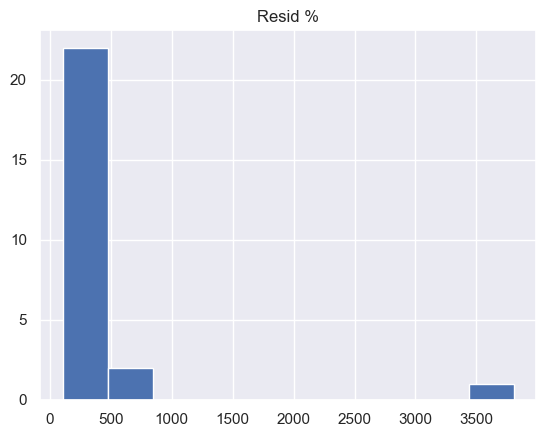

In [43]:
hisB=bottom25B.hist(column='Resid %')

In [44]:
#Resid % (copy2) is a better indicator of who is overvalued and undervalued

#now grouping by team to determine which teams best value their players, and if there's an effect on how much they win?
teams=copy.groupby('Team').mean()
teams['Resid %']=(teams['Residuals']/teams['% of Cap']) *100
teams=teams.drop("Season", axis=1)


In [45]:
#adding in wins per team over 1995-2017
x=pd.read_csv('nbaTeamWins.csv')
wins=x[['Team', 'Average Wins']]
wins.set_index('Team')
lis=wins['Average Wins'].tolist()
teams['Avg Wins']=lis
teams

Age        PER   % of Cap  Predicted % of Cap  Residuals  \
Team                                                                   
ATL   26.753676  13.634559   8.691794            9.040563  -0.348769   
BOS   26.334586  13.404887   8.808181            8.801429   0.006753   
BRK   27.003745  13.218352   9.258158            9.134652   0.123506   
CHI   27.022472  13.411610   9.469930            9.077095   0.392835   
CHO   26.505263  12.938947   6.883444            8.366333  -1.482889   
CLE   26.393502  13.250181   8.866430            9.154724  -0.288294   
DAL   27.907749  14.198893   9.711257            8.814293   0.896964   
DEN   26.533333  13.967451   8.251178            9.347896  -1.096718   
DET   27.228137  13.817871   8.482736            8.557897  -0.075161   
GSW   26.228782  14.033210   9.082171            9.601022  -0.518850   
HOU   27.432540  14.166270   8.521870            9.346363  -0.824493   
IND   27.154812  13.781590   8.666897            8.640556   0.026341   
LAC   26.539033  13.775836   8.397263            9.417200  -1.019937   
LAL   26.718750  14.266406  10.698897            9.513367   1.185530   
MEM   26.400000  13.627037   8.724687            8.802688  -0.078002   
MIA   28.228448  14.008621  10.221812            9.560450   0.661362   
MIL   26.620818  14.062825   9.184239            9.420880  -0.236641   
MIN   26.070111  13.387085   8.591708            9.103285  -0.511578   
NOP   26.942966  14.141445   8.774514            9.558181  -0.783667   
NYK   28.024194  13.200000  11.554707            9.037486   2.517221   
OKC   26.364583  13.738542   8.988671            8.897998   0.090673   
ORL   26.607407  13.642593   9.755973            9.454028   0.301946   
PHI   25.849785  13.324893   8.100765            9.158632  -1.057868   
PHO   27.125523  14.130126  10.248546            9.547063   0.701484   
POR   26.272388  13.903358  10.365960            8.936769   1.429191   
SAC   26.617329  13.875812   9.093182            9.720504  -0.627322   
SAS   29.200837  14.691632   9.230005            8.528033   0.701972   
TOR   26.556420  14.099611   8.599649            9.248561  -0.648911   
UTA   26.315589  13.939163   8.382853            8.649290  -0.266438   
WAS   26.243636  13.548364   9.522836            9.366019   0.156818   

        Resid %   Avg Wins  
Team                        
ATL   -4.012618  38.217391  
BOS    0.076664  40.869565  
BRK    1.334025  33.826087  
CHI    4.148237  40.826087  
CHO  -21.542836  31.857143  
CLE   -3.251523  40.130435  
DAL    9.236333  44.521739  
DEN  -13.291660  37.739130  
DET   -0.886048  41.521739  
GSW   -5.712845  37.956522  
HOU   -9.675030  45.739130  
IND    0.303931  43.956522  
LAC  -12.146065  35.347826  
LAL   11.080863  45.956522  
MEM   -0.894034  33.000000  
MIA    6.470104  45.652174  
MIL   -2.576596  35.782609  
MIN   -5.954320  34.739130  
NOP   -8.931172  40.043478  
NYK   21.785246  36.043478  
OKC    1.008752  45.434783  
ORL    3.094983  39.043478  
PHI  -13.058860  34.304348  
PHO    6.844715  41.826087  
POR   13.787347  43.304348  
SAC   -6.898818  36.130435  
SAS    7.605330  54.739130  
TOR   -7.545790  36.695652  
UTA   -3.178366  45.739130  
WAS    1.646755  34.826087

/Users/amrutagajananbhat/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


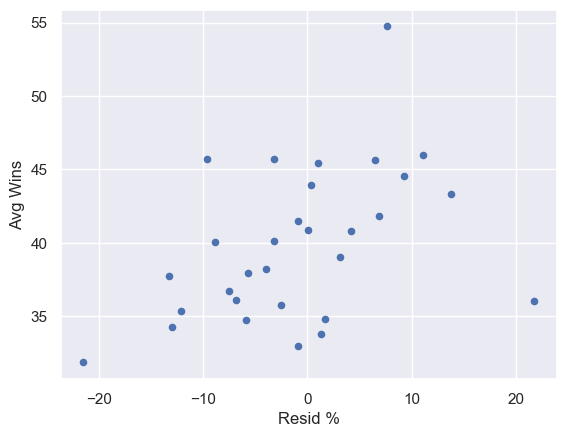

In [46]:
scat=teams.plot.scatter('Resid %', 'Avg Wins')